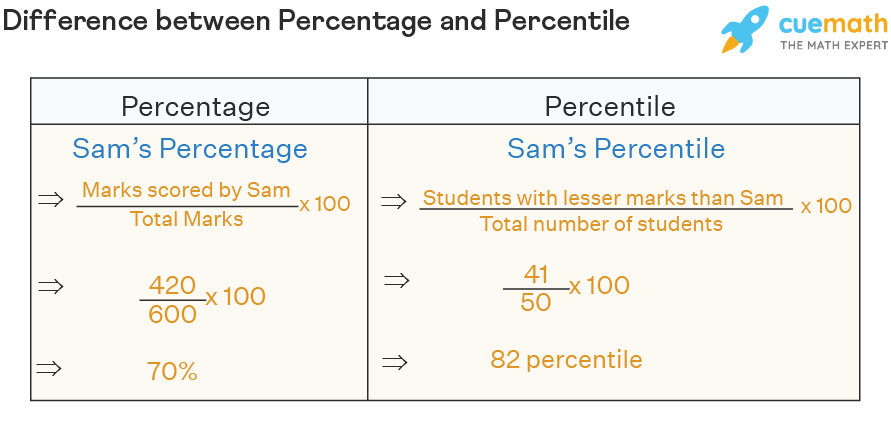  
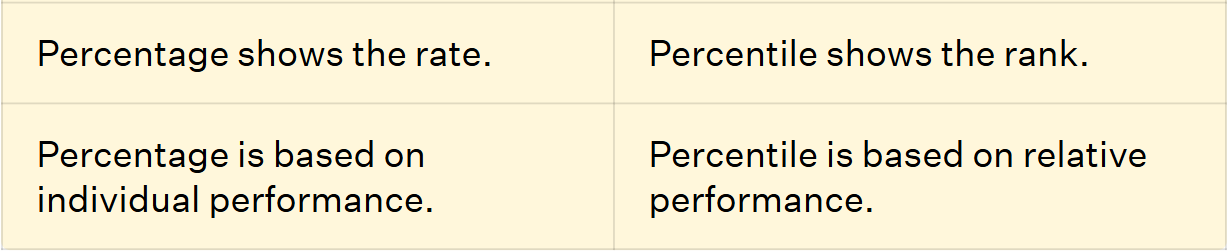

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv(r"D:\Github\Data-Science-And-Machine-Learning-Course\DSML Class Orchid\Day 4\titanic_train.csv")

In [4]:
data.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [5]:
data["Age"].fillna(data["Age"].mean(), inplace = True)
data["Age"].isna().sum()

C:\Users\Sandesh Khatiwada\AppData\Local\Temp\ipykernel_8464\1448931505.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["Age"].fillna(data["Age"].mean(), inplace = True)


0

In [8]:
q1 = np.percentile(data["Age"], 25)   # 25th percentile
q2 = np.percentile(data["Age"], 50)   # 50th percentile (median)
q3 = np.percentile(data["Age"], 75)   # 75th percentile
print("25th percentile: ", q1)
print("50th percentile: ", q2)
print("75th percentile: ", q3)

25th percentile:  22.0
50th percentile:  29.69911764705882
75th percentile:  35.0


In [10]:
interquatile_range = q3 - q1
print("interquatile_range is: ", interquatile_range)

interquatile_range is:  13.0


### Finding Outliers

In [13]:
lower_bound = q1 - 1.5 * interquatile_range
upper_bound = q3 + 1.5 * interquatile_range

print("Lower Bound:", lower_bound)
print("Upper Bound:", upper_bound)

# Detect outliers
outliers = data[(data["Age"] < lower_bound) | (data["Age"] > upper_bound)]
print("Outliers:\n")
outliers

Lower Bound: 2.5
Upper Bound: 54.5
Outliers:



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.00,3,1,349909,21.0750,NaN,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.00,0,0,113783,26.5500,C103,S
15,16,1,2,"Hewlett, Mrs. (Mary D Kingcome)",female,55.00,0,0,248706,16.0000,NaN,S
16,17,0,3,"Rice, Master. Eugene",male,2.00,4,1,382652,29.1250,NaN,Q
33,34,0,2,"Wheadon, Mr. Edward H",male,66.00,0,0,C.A. 24579,10.5000,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
827,828,1,2,"Mallet, Master. Andre",male,1.00,0,2,S.C./PARIS 2079,37.0042,NaN,C
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.00,0,0,113572,80.0000,B28,NaN
831,832,1,2,"Richards, Master. George Sibley",male,0.83,1,1,29106,18.7500,NaN,S
851,852,0,3,"Svensson, Mr. Johan",male,74.00,0,0,347060,7.7750,NaN,S
